# Inference and Representation Homework 5
## Alex Pine, 2015/09/29

# TODO write who you collaborated with

## Question 1

I collaborated with Peter Li, Maya Rotmensch, and Israel Malkin on this problem.

We are given the following:
$$ p(x) = \frac{1}{Z}\text{exp}\bigg[\sum_{i < j}^{n}w_{ij}x_ix_j - \sum_{i}^{n}u_ix_i\bigg], x_i \in \{0,1\} $$

Define $ y \in \{-1, 1\} $, so $ y = 2x - 1 $, and $ x = \frac{1}{2}(y+1) $. Then let 

$$ S = \sum_{i < j}^{n}w_{ij}x_ix_j - \sum_{i}^{n}u_ix_i $$. 

$$ S = x^T\mathbf{W}x - u^Tx $$

Where $ \mathbf{W}_{ij} = w_{ij} $ if $ (i, j) \in E, \mathbf{W}_{ij} = 0 $ otherwise.

$$ S = \frac{1}{2}(y + \mathbf{1})^T \mathbf{W} \frac{1}{2}(y + \mathbf{1}) - u^T (\frac{1}{2}(y + \mathbf{1})) $$

$$ S = \frac{1}{4}(y + \mathbf{1})^T \mathbf{W} (y + \mathbf{1}) - \frac{1}{2} u^T (y + \mathbf{1}) $$

$$ S = \frac{1}{4}(y^T + \mathbf{1}^T) (\mathbf{W}y + \mathbf{W}\mathbf{1}) - \frac{1}{2} u^T (y + \mathbf{1}) $$

$$ S = \frac{1}{4}(y^T\mathbf{W}y + y^T\mathbf{W}\mathbf{1} + \mathbf{1}^T\mathbf{W}y + \mathbf{1}^T\mathbf{W}\mathbf{1}) - \frac{1}{2} u^T (y + \mathbf{1}) $$

Since $ y^T\mathbf{W}\mathbf{1} $ is a scalar, $ y^T\mathbf{W}\mathbf{1} = (y^T\mathbf{W}\mathbf{1})^T = \mathbf{1}^T \mathbf{W}^T y $. Substituting that into our expression for $S$, we get

$$ S = \frac{1}{4}(y^T\mathbf{W}y + \mathbf{1}^T \mathbf{W}^T y + \mathbf{1}^T\mathbf{W}y + \mathbf{1}^T\mathbf{W}\mathbf{1}) - \frac{1}{2} u^T (y + \mathbf{1}) $$


$$ S = \frac{1}{4}(y^T\mathbf{W}y + \mathbf{1}^T ( \mathbf{W}^T + \mathbf{W} ) y + \mathbf{1}^T\mathbf{W}\mathbf{1}) - \frac{1}{2} u^T (y + \mathbf{1}) $$

$$ S = \frac{1}{4}y^T\mathbf{W}y + \frac{1}{4}\mathbf{1}^T ( \mathbf{W}^T + \mathbf{W} ) y + \frac{1}{4}\mathbf{1}^T\mathbf{W}\mathbf{1} - \frac{1}{2} u^T y - \frac{1}{2} u^T \mathbf{1} $$

$$ S = \frac{1}{4}y^T\mathbf{W}y + \frac{1}{4}(\mathbf{1}^T ( \mathbf{W}^T + \mathbf{W} ) - 2u^T ) y - \frac{1}{2}u^T\mathbf{1} $$

This implies 

$$ \mathbf{W}' = \frac{1}{4}\mathbf{W} $$

$$ u' = \frac{1}{4}(( \mathbf{W} + \mathbf{W}^T )\mathbf{1}  - 2u ) $$

$$ Z' = \frac{Z}{\text{exp}(-\frac{1}{2}u^T\mathbf{1})} $$


## TODO Question 2 pairwise Markov random field

I collaborated with Peter Li and Israel Malkin on this problem.

Let $\mathbf{X}$ represent a vector of $n$ discrete random variables that can take on $s$ states each. First, let's assume that  $ p(\mathbf{X}) $ can be represented with a fully connected MRF, so that $ p(\mathbf{X}) \propto \psi(X_1, ..., X_n) $.

$ \psi $ can take on $ s^n $ different states, one for each possible value of $\mathbf{X}$. We can impose an arbitrary order on these states, which we'll call $\chi$. For example, if $n = 2$ and $s = 2$, then $\chi = [(0, 0), (1, 0), (0, 1), (1,1)]$. $\chi_2 = (1,0)$, and $\chi_{2,1} = 1$.

Then let $ Y $ be a new random variable that can take on values $1,...,s^n$. We can then make a new MRF that has $Y$ and all $X_i \in \mathbf{X}$ as nodes, and has edges between each $X_k$ and $Y$. This new pairwise MRF has the following potentials:

$$ \phi(Y = i) = \psi(\chi_i) $$
$$ \phi(Y = y, X_j = x) = 1, \text{if } y = \psi(\chi_i) \text{ and } x = \chi_{ij}, \text{ and } 0 \text{ otherwise}. $$

This new MRF factorizes as 
$$ p'(Y, \mathbf{X}) = \phi(Y)\prod_{i=1}^{n}\phi(Y, X_i) $$

Marginalizing, we have 

$$ p'(\mathbf{X} = \chi_j) = \sum_{i=1}^{n}\big[ \phi(Y = i)\prod_{k=1}^{n}\phi(Y = i, X_k = \chi_{jk}) \big] $$

In the sum, when $i = j$, then $\phi(Y = i) = \psi(\chi_i)$, and all the values of $\phi(Y = i, X_k = \chi_{jk}) = 1, k \in 1,...,n$. However, when $i \ne j $ in the sum, $\phi(Y = i, X_k = \chi_{jk}) = 0$ for at least one value of $k \in 1,...,n$, zeroing out that term in the sum. Therefore, 

$$ p'(\mathbf{X} = \chi_j) = \phi(Y = j) = \psi(\chi_j) $$.

This is equivalent to the definition of p(\mathbf{X}), implying that this new pairwise MRF maps to the original probability distribution once $Y$ is marginalized.

TODO extend to more than one clique!

## TODO Question 3

## TODO Question 4

## Question 5: Text message analysis with pymc3

Code, data summary, and graphical summary given below:

 [-----------------100%-----------------] 10000 of 10000 complete in 66.5 sec
first_switchpoint:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  32.670           4.087            0.344            [27.000, 37.000]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  28.000         32.000         33.000         33.000         42.000


second_switchpoint:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  60.409           3.162            0.111            [53.000, 66.000]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  53.000         59.000         61.000         62.000         67.000

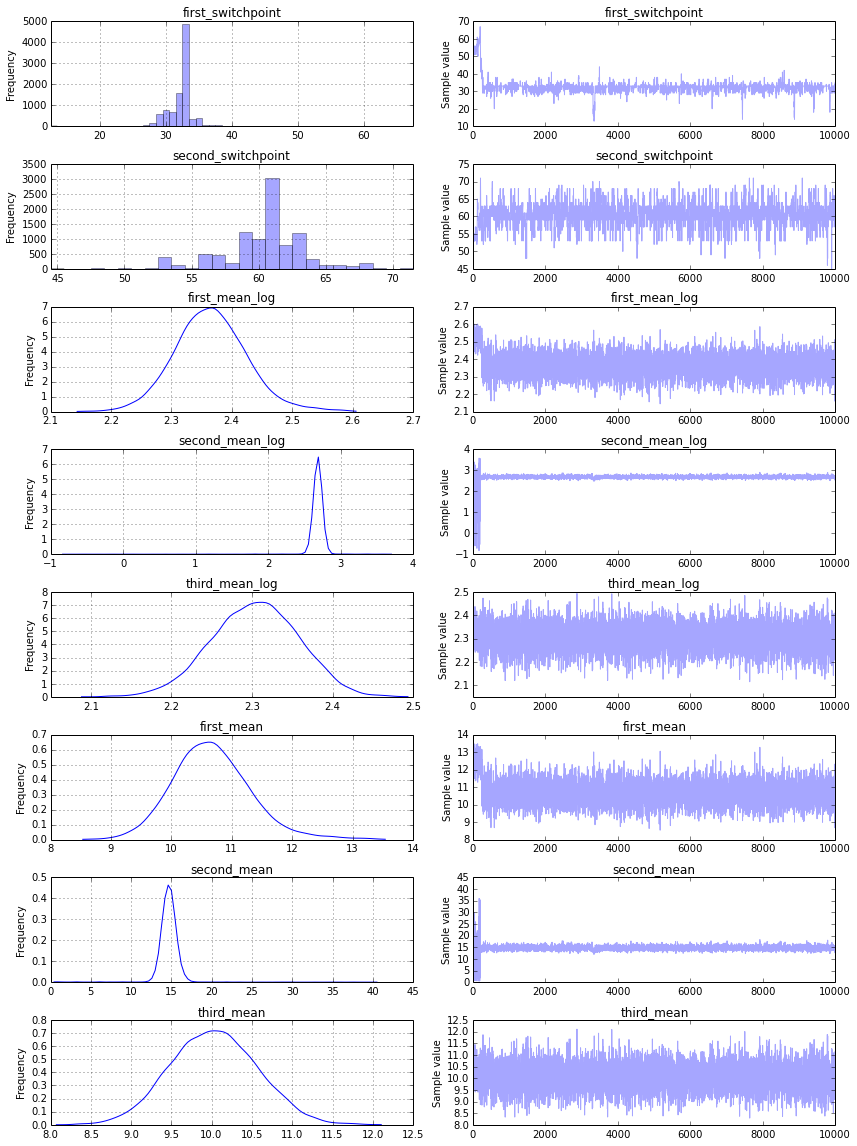

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pymc3 as pm
import theano.tensor as t

@pm.theano.compile.ops.as_op(itypes=[t.lscalar, t.lscalar, t.dscalar, t.dscalar,
                                     t.dscalar],
                             otypes=[t.dvector])
def rateFunc(first_switchpoint, second_switchpoint, first_mean, second_mean,
             third_mean):
    out = np.empty(n_count_data)
    out[:first_switchpoint] = first_mean
    out[first_switchpoint:second_switchpoint] = second_mean
    out[second_switchpoint:] = third_mean
    return out

count_data = np.loadtxt('/Users/pinesol/inference/hw2/text_data.csv')
n_count_data = len(count_data)

with pm.Model() as text_model:
    first_switchpoint = pm.DiscreteUniform('first_switchpoint', lower=0,
                                           upper=n_count_data)
    second_switchpoint = pm.DiscreteUniform('second_switchpoint',
                                            lower=0,
                                            upper=n_count_data) 
    alpha = 1.0 / count_data.mean()
    first_mean = pm.Exponential('first_mean', lam=alpha)
    second_mean = pm.Exponential('second_mean', lam=alpha)
    third_mean = pm.Exponential('third_mean', lam=alpha)

    rate = rateFunc(first_switchpoint, second_switchpoint, first_mean,
                    second_mean, third_mean)

    text_count = pm.Poisson('text_count', rate, observed=count_data)
    
    step1 = pm.Slice([first_mean, second_mean, third_mean])
    step2 = pm.Metropolis([first_switchpoint, second_switchpoint])
    trace = pm.sample(10000, step=[step1, step2])
    pm.summary(trace)
    pm.traceplot(trace)
    plt.show()

The summary statistics and their associated charts indicate that the first switch point probably occured somewhere around day 33, and the second one around day 60. The mean rate of text messages per day was around 10.67 before the first switch point, 14.67 messages per day afterwards, and then 10.03 after the second switchpoint.
